# Project: Predicting Housing Prices

SP18: APPLIED MACHINE LEARNING: 33910, Indiana University

Submitted By: Murali Cheruvu

Phase 4 - Deliverables:

1. Read Training and Testing Datasets
     - Explore data and basic metrics
2. Exploratory Data Analysis (EDA) 
      - Numereical and Categorical Analysis
      - Null and Skewed Data Dnalysis
      - Various visualizations      
      - Outlier Analysis (**Phase 2**)
3. ML Pipeline
      - Feature Engineering (**Phase 2, 3 and 4**)
      - Numerical Imputation
      - Categorical Encoding
      - Data Normalization (scaling)      
      - Dimensionality Reduction (**Phase 2, 3 and 4**)
      - Modeling and predictions using:
          - Ridge
          - Lasso
          - SVM
          - Random Forest
          - XGB Boosting      
4. Report RMSE for the algorithm predictions
5. Cross Validation (**Phase 2 and 3**)
6. Hyper-parameter tuning (**Phase 2, 3 and 4**)
7. Best model and test data sale price predictions(**Phase 2, 3 and 4**)
8. Ensemble and Kaggle Submission (**Phase 2, 3 and 4**)

# Introduction

Real estate, having more than $50 Billion dollar yearly revenue, is a continued growing industry in United States. With more than 200,000 residential and commercial brokerage firms, there are millions houses getting sold every year. In recent times, Big Data has changed the way real estate is getting operated and bringing the importance of data analysis to become major factor in the decision making process. The goal of this project is to predict the sale prices of residential homes listed in the test dataset as accurately as possible. Training dataset contains sale price of the homes, and using this training data set, how accurately we can predict sale prices of the homes in the test dataset by applying data preprocessing and thorough data analysis. In this project, we apply various exploratory analysis techniques and engineer the features before applying a few advanced supervised learning algorithms to create more accurately predicted models.

Kaggle Website provides the dataset for the housing prices- training and testing, each with 79 exploratory variables describing almost every aspect of residential homes in city of Ames, Iowa State. However, these datasets are snapshots taken in 2010. As a result, these datasets may not reflect the latest trends in the housing sale prices but the analytical approaches taken in this project are generic and can easily be applied to newer datasets.

More information about this dataset can be found from Kaggle Website:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques


# Dataset Description

The training and testing sample datasets contain the same variables explaining the housing real estate aspects. Training dataset contains the sale price information whereas the testing dataset does not contain the sale price as that is the target variable we need to predict using supervised machine learning algorithm. Following are the list of variables describing the housing real estate domain. Good understanding of the domain is needed for better exploratory data analysis and to apply the matching machine learning algorithms to the problem space.

- There are 1460 rows in the training data set and 1459 rows in the test dataset. 

- **Out of the 80 variables - 23 are nominal, 23 are ordinal, 14 are discrete, and 20 are continuous.** 

- The nominal variables are related to material, garage, dwelling, and environmental conditions. 

- All the 20 continuous variables are related to the area dimensions. 

- The ordinal variables rate various items within the property. 

- The home listing includes only few quantified variables like typical lot size and total dwelling square footage, but this data set has more specific variables. There are individual category variables derived from basement, main living area and porch based on quality and type.

Following are the variables/features with description:

- Id: Row Id

- SalePrice: Sale price of the house in dollars. This is the target variable to predict.

- Neighborhood: Information about the neighborhood, zoning and lot.
    Examples: MSSubClass, LandContour, Neighborhood, BldgType

- Dates: Time based data about when it was built, remodeled or sold.
    Examples: YearBuilt, YearRemodAdd, GarageYrBlt, YrSold

- Quality/Condition: There are categorical assessment of the various features of the houses, most likely from the property assessor.
    Examples: PoolQC, SaleCondition,GarageQual, HeatingQC

- Property Features: Categorical collection of additional features and attributes of the building
    Examples: Foundation, Exterior1st, BsmtFinType1,Utilities

- Square Footage: Area measurement of section of the building and features like porches and lot area(which is in acres)
    Examples: TotalBsmtSF, GrLivArea, GarageArea, PoolArea, LotArea

- Room/Feature Count: Quantitative counts of features (versus categorical) like rooms, prime candidate for feature engineering
    Examples: FullBath, BedroomAbvGr, Fireplaces,GarageCars

- Pricing : Monetary values, one of which is the sales price we are trying to determine
    Examples: SalePrice, MiscVal

# Python Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # For easier statistical plotting
sns.set_style("whitegrid")
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet # Linear models
from sklearn.ensemble import RandomForestRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

#%config InlineBackend.figure_format = 'retina'
   
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


# Read Datasets

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


The training dataset consists of 1460 observations with 80 features and 1 target (81 in total) and the test set consists of 1459 observations with 80 features. Let's look at the data and explore the tructure.

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#print(df_train.info())
for i in df_train.columns:
    print(i,',' ,'{:.1%}'.format(np.mean(df_train[i].isnull())),
                          'nulls',',',
                          type(df_train[i][0]), df_train[i].nunique(), 'unique values')

Id , 0.0% nulls , <class 'numpy.int64'> 1460 unique values
MSSubClass , 0.0% nulls , <class 'numpy.int64'> 15 unique values
MSZoning , 0.0% nulls , <class 'str'> 5 unique values
LotFrontage , 17.7% nulls , <class 'numpy.float64'> 110 unique values
LotArea , 0.0% nulls , <class 'numpy.int64'> 1073 unique values
Street , 0.0% nulls , <class 'str'> 2 unique values
Alley , 93.8% nulls , <class 'float'> 2 unique values
LotShape , 0.0% nulls , <class 'str'> 4 unique values
LandContour , 0.0% nulls , <class 'str'> 4 unique values
Utilities , 0.0% nulls , <class 'str'> 2 unique values
LotConfig , 0.0% nulls , <class 'str'> 5 unique values
LandSlope , 0.0% nulls , <class 'str'> 3 unique values
Neighborhood , 0.0% nulls , <class 'str'> 25 unique values
Condition1 , 0.0% nulls , <class 'str'> 9 unique values
Condition2 , 0.0% nulls , <class 'str'> 8 unique values
BldgType , 0.0% nulls , <class 'str'> 5 unique values
HouseStyle , 0.0% nulls , <class 'str'> 8 unique values
OverallQual , 0.0% nulls 

In [9]:
#print(df_test.info())
for i in df_test.columns:
    print(i,',' ,'{:.1%}'.format(np.mean(df_test[i].isnull())),
                          'nulls',',',
                          type(df_test[i][0]), df_test[i].nunique(), 'unique values')

Id , 0.0% nulls , <class 'numpy.int64'> 1459 unique values
MSSubClass , 0.0% nulls , <class 'numpy.int64'> 16 unique values
MSZoning , 0.3% nulls , <class 'str'> 5 unique values
LotFrontage , 15.6% nulls , <class 'numpy.float64'> 115 unique values
LotArea , 0.0% nulls , <class 'numpy.int64'> 1106 unique values
Street , 0.0% nulls , <class 'str'> 2 unique values
Alley , 92.7% nulls , <class 'float'> 2 unique values
LotShape , 0.0% nulls , <class 'str'> 4 unique values
LandContour , 0.0% nulls , <class 'str'> 4 unique values
Utilities , 0.1% nulls , <class 'str'> 1 unique values
LotConfig , 0.0% nulls , <class 'str'> 5 unique values
LandSlope , 0.0% nulls , <class 'str'> 3 unique values
Neighborhood , 0.0% nulls , <class 'str'> 25 unique values
Condition1 , 0.0% nulls , <class 'str'> 9 unique values
Condition2 , 0.0% nulls , <class 'str'> 5 unique values
BldgType , 0.0% nulls , <class 'str'> 5 unique values
HouseStyle , 0.0% nulls , <class 'str'> 7 unique values
OverallQual , 0.0% nulls 

The dataset contains features that are floats, integers and strings (objects). There are missing values in both the training and test sets. 

# Domain Knowledge

To predict accurate sale price,we will need to understand the domain well. We need to build the intuition around all the exploratory variables in the dataset and focus on which factors could influence the target variable: sale price. If we do not find all these factors, perhaps, we need to add new features to address the gaps in dataset describing the domain. Some of the factors which, we think, can directly influence house prices are:

• What is the overall Size or area of the house?

• How good is the location of the house - closer to highways?

• How good is the neighborhood?

• How old is the house?

• What is the quality of the construction?

• How many garages are there in the house?

• What are the floor plans?

• How many number of bedrooms are there in the house?

• How many number of bathrooms are there in the house?

• What is the size of living area?
    
    

# Exploratory Data Analysis (EDA)

We can start the process with exploratory data analysis. We apply **univariate, bivariate and multivariate** analytical techniques to analyze numerical and categorical variables. Various statistical and data visualizations were applied on each type of variable. The primary goal of exploratory data analysis is to amplify the insights of analysts onto given input dataset to analyze the aspects, such as:

- Good fitting of the model

- Analyzing impact of the outliers

- Missing value analysis and imputation

- Feature engineering and ranking

- Algorithm selection and tuning for optimal predictions


## Summary Statistics

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Note:** As we can see, the features (and also the target) are not on a similar scale. It is important to standarize the dataset before feeding them to some machine learning algorithms (like Linear Regression or LASSO). Let's go ahead and plot the correlations between the features.

## Data Analysis and Visualization



### Analyze Numerical Variables

In [11]:
numerical_features =  [f for f in df_train.columns if (df_train[f].dtype == 'float64') or (df_train[f].dtype == 'int64')]
numerical_features.remove('Id')
numerical_features.remove('SalePrice')
print('total numerical features: {}'.format(len(numerical_features)))
print(numerical_features)
  

total numerical features: 36
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


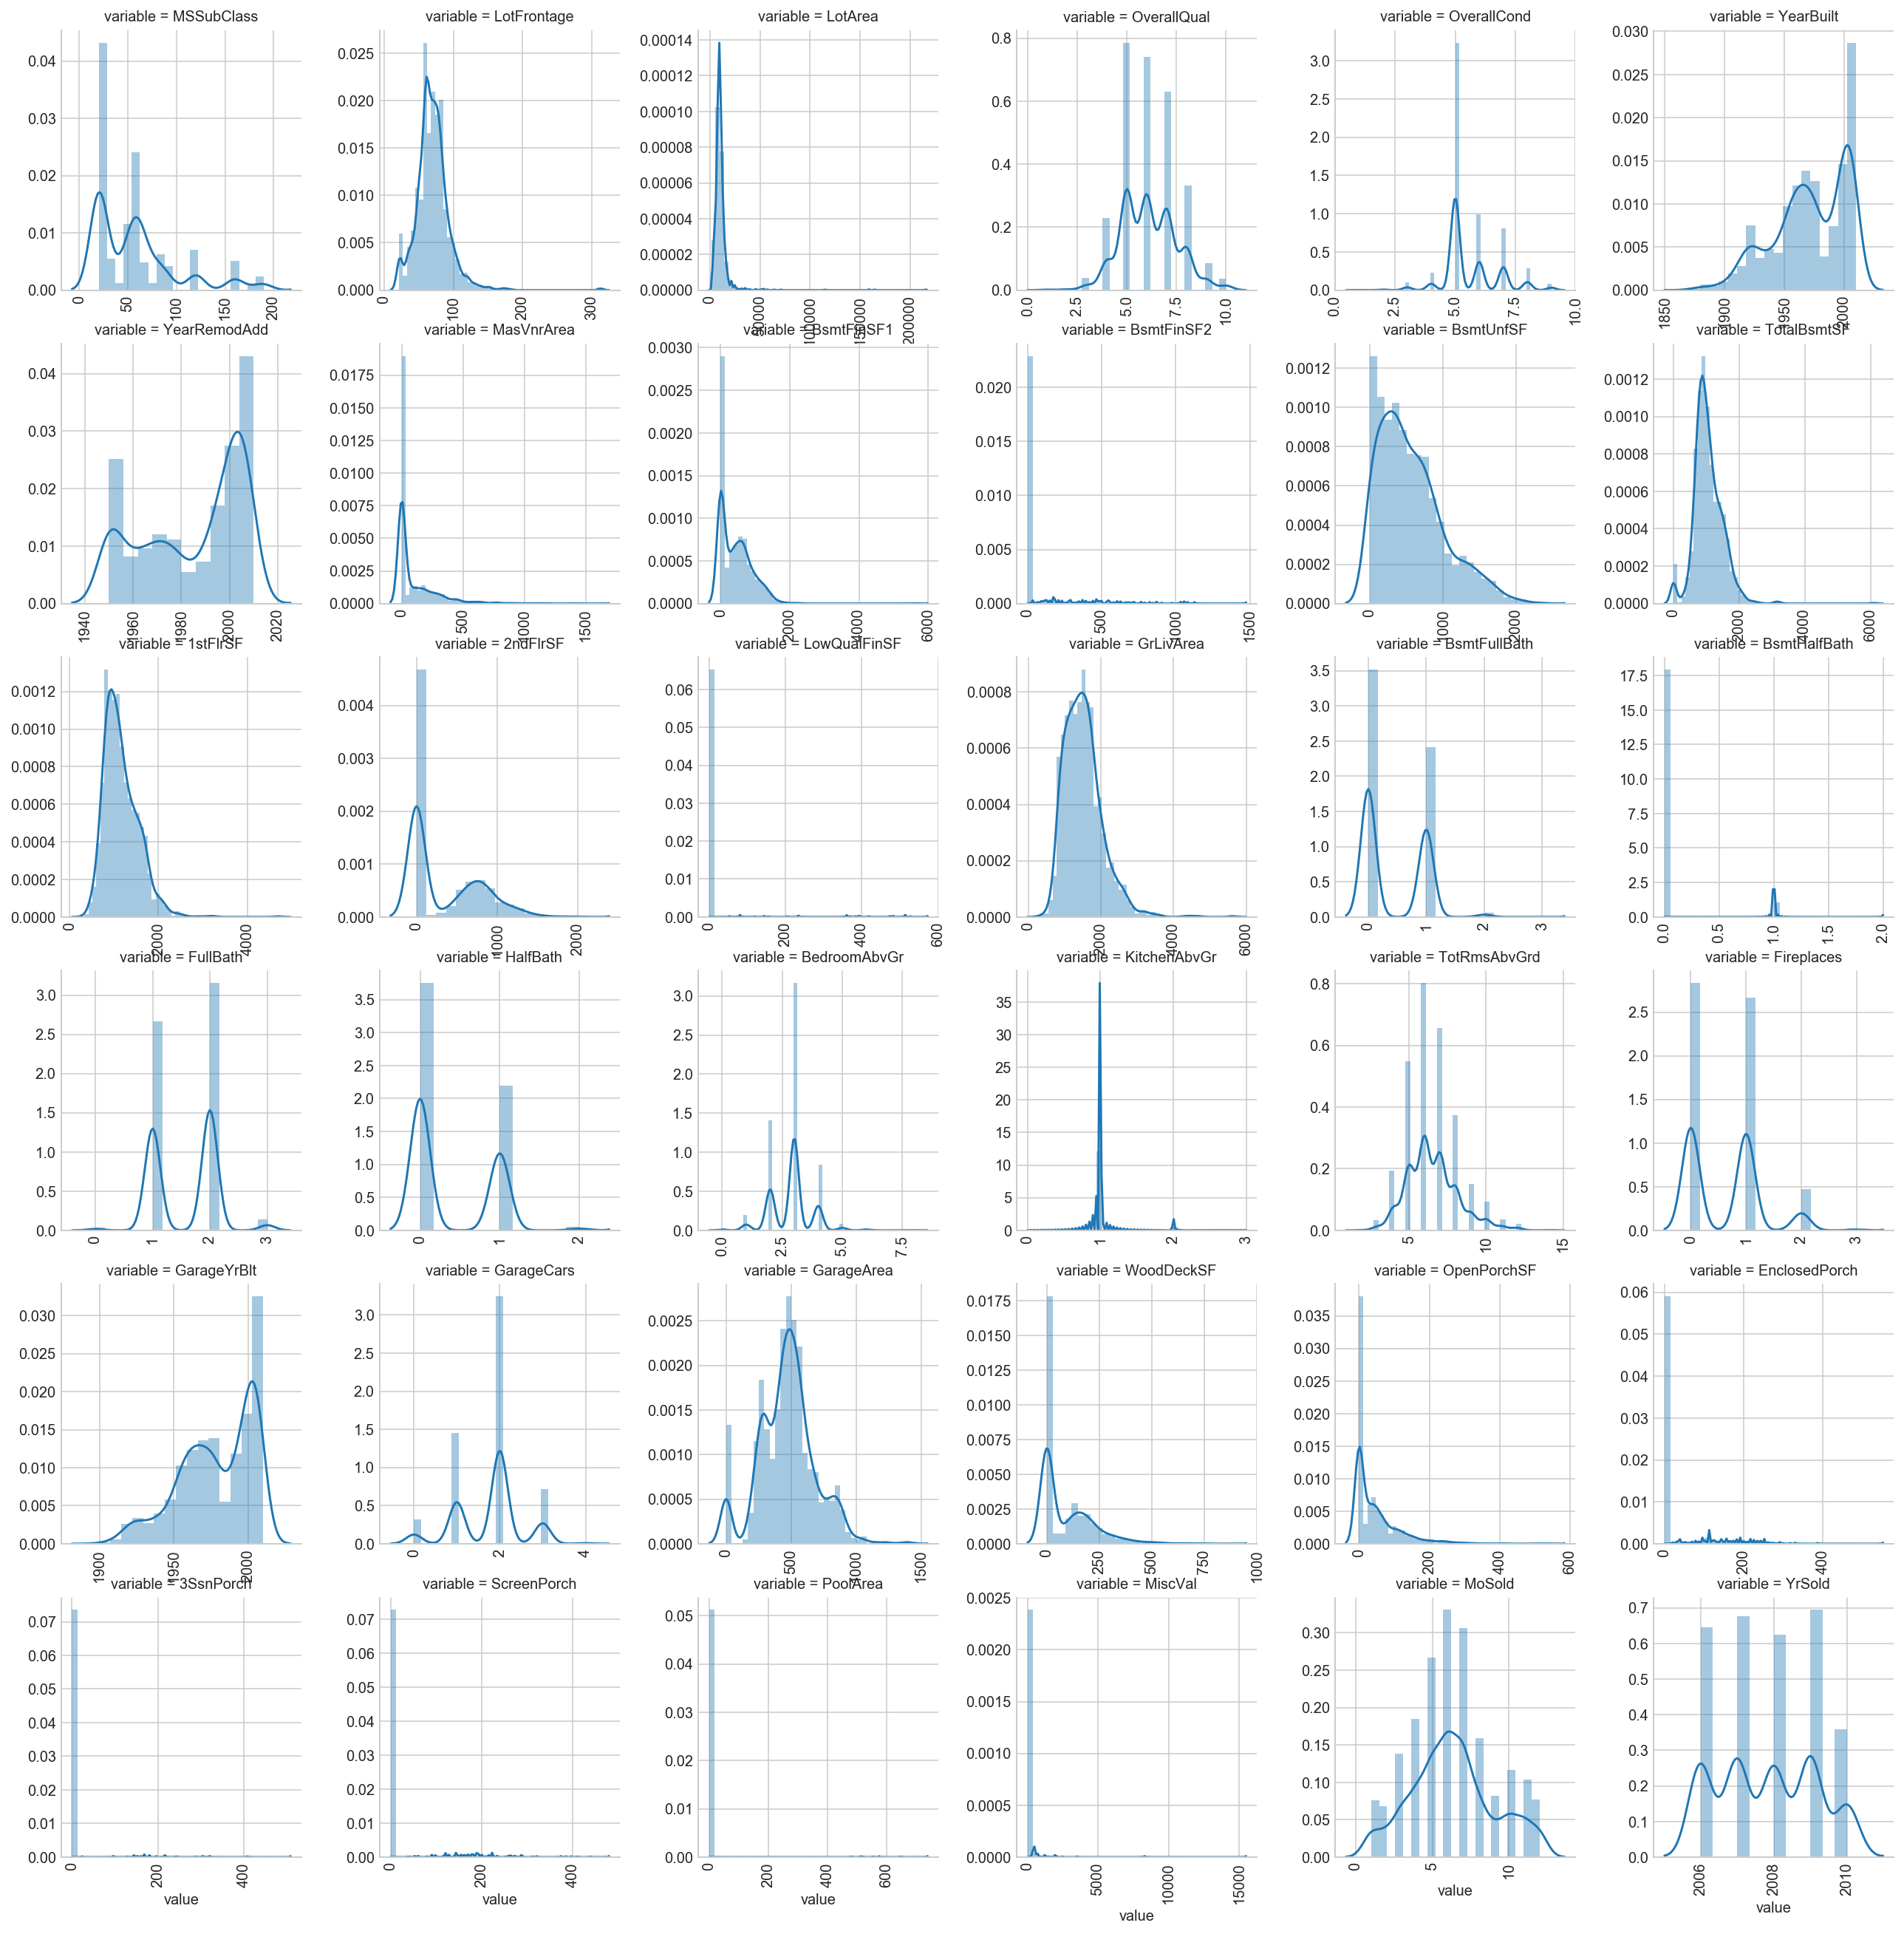

In [9]:
nd = pd.melt(df_train, value_vars = numerical_features)

plt.figure(figsize = (5,3))

plot = sns.FacetGrid (nd, col='variable', col_wrap=6, sharex=False, sharey = False)
plot = plot.map(sns.distplot, 'value')

for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
    #end for
#end for     


### Numeric Features - Correlation Map

Next, let's determine whether any of the 36 numeric variables are highly correlated with one another.

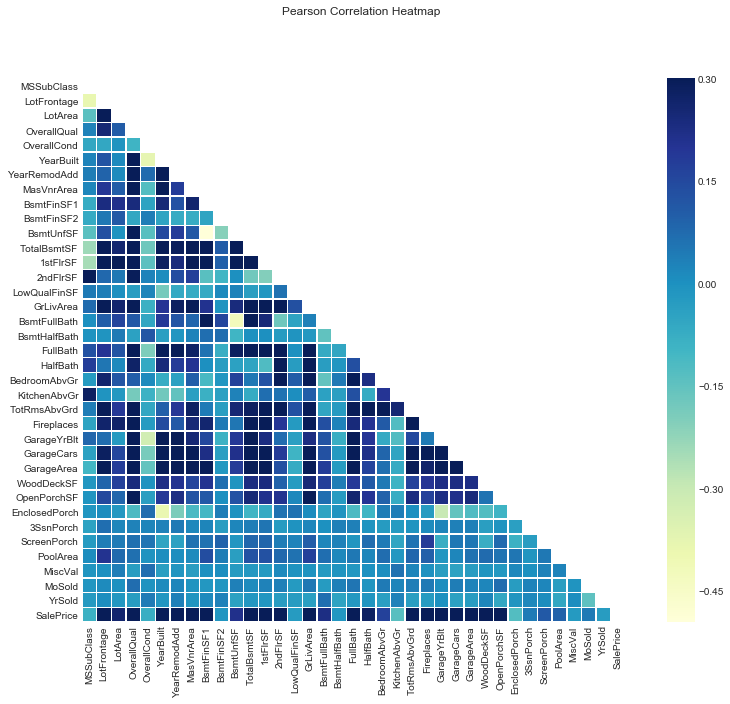

In [21]:
corr = df_train.drop(["Id"],axis=1).corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (15,10))
pd.set_option('precision',2)

#sns.heatmap(corr, square=True, cmap="YlGnBu", linewidths=.5,  mask=mask, vmax=.3, annot=True)
sns.heatmap(corr, square=True, cmap="YlGnBu", linewidths=.5,  mask=mask, vmax=.3)

plt.suptitle("Pearson Correlation Heatmap")
plt.show()

### Correlation with SalePrice

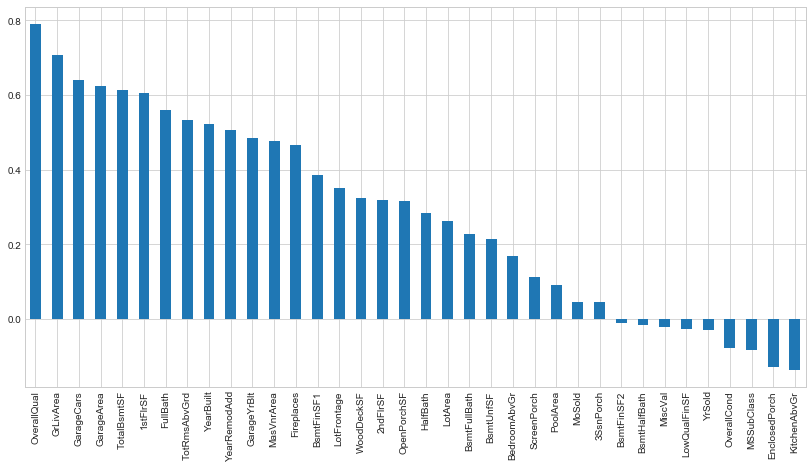

In [22]:
corr_with_SalePrice = df_train.drop(["Id"], axis=1).corr()["SalePrice"].sort_values(ascending=False)
plt.figure(figsize=(14,7))
corr_with_SalePrice.drop("SalePrice").plot.bar()
plt.show()

del corr_with_SalePrice

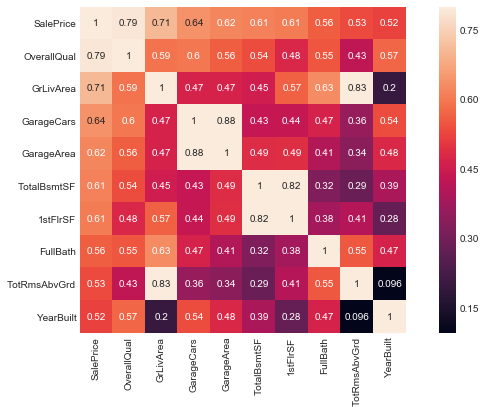

In [4]:
corrmat = df_train.corr()
cols = corrmat.nlargest(10,'SalePrice')['SalePrice'].index
zoomcorr = np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(zoomcorr,vmax=.8,square=True,annot=True,xticklabels=cols.values, yticklabels=cols.values,annot_kws={'size': 10})

A quick correlation check reveals that there is a far amount of correlation for sales price with a couple of variables:

- OverallQual: 0.790982
- GrLivArea: 0.708624
- GarageCars: 0.640409
- GarageArea: 0.623431
- TotalBsmtSF: 0.613581
- 1stFlrSF: 0.605852
- FullBath: 0.560664
- TotRmsAbvGrd: 0.533723
- YearBuilt: 0.522897
- YearRemodAdd: 0.507101

There exists strong correlations between some of the features. As an example, GarageCars and GarageArea are strongly correlated which makes sense since as the data field mentions:

- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet

Both variables express more or less the same thing. We should figure out a way later to un-correlate  input features as much as possible to reduce redundancy. Let's take a look at the distribution of the numerical features.

Let's look into a few interesting features more closely in relation to Sale Price.

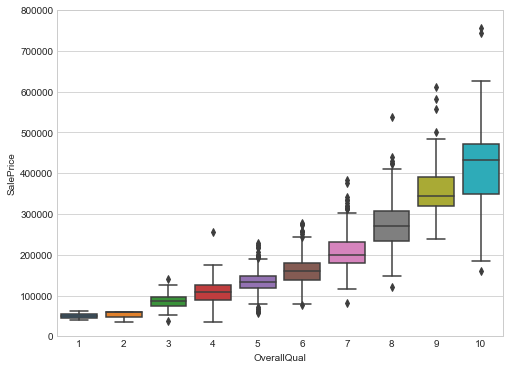

In [23]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

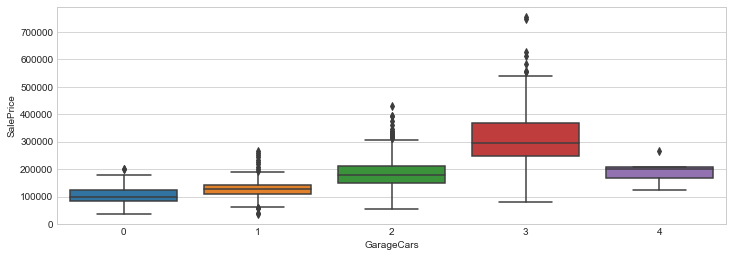

In [24]:
# Garage Cars vs Sale Price
sns.boxplot(x=df_train['GarageCars'], y=df_train['SalePrice'])

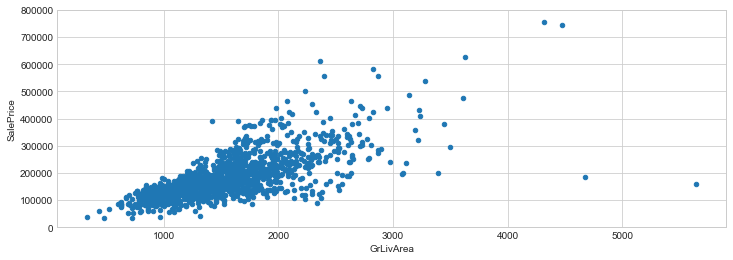

In [25]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

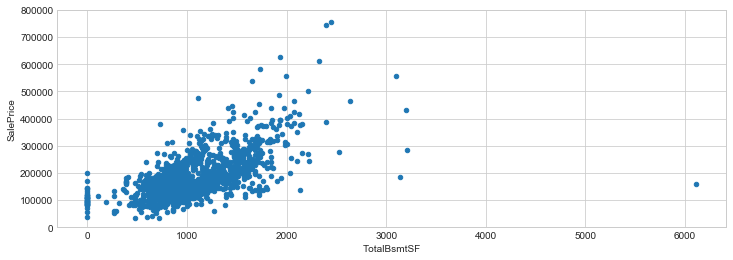

In [26]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

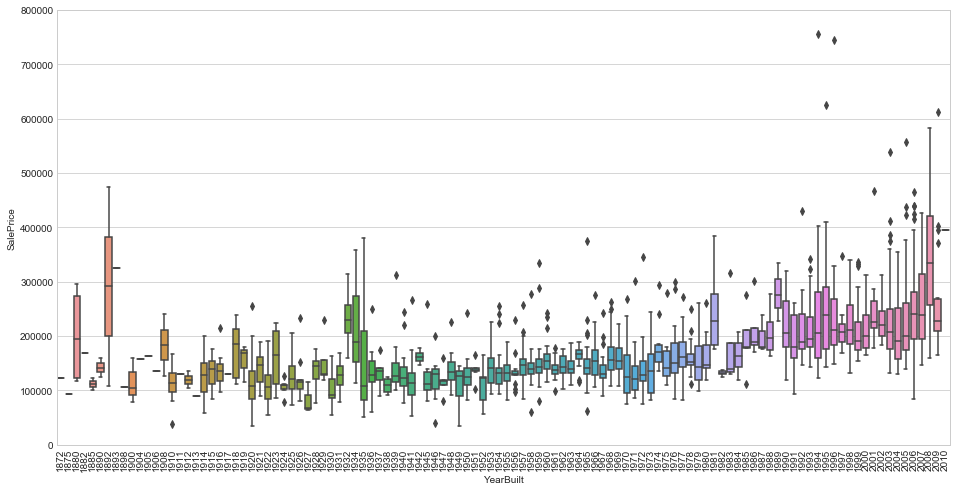

In [27]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### Pair-wise Correlations

The correlation of SalePrice with OverallQual (Overall material and finish quality) is the greatest (around 0.8). Also GrLivArea (Above grade (ground) living area square feet) presents a correlation of 0.8 with SalePrice. Let's pick a few interesting features and perform a pairplot to visualize the dependencies between them.

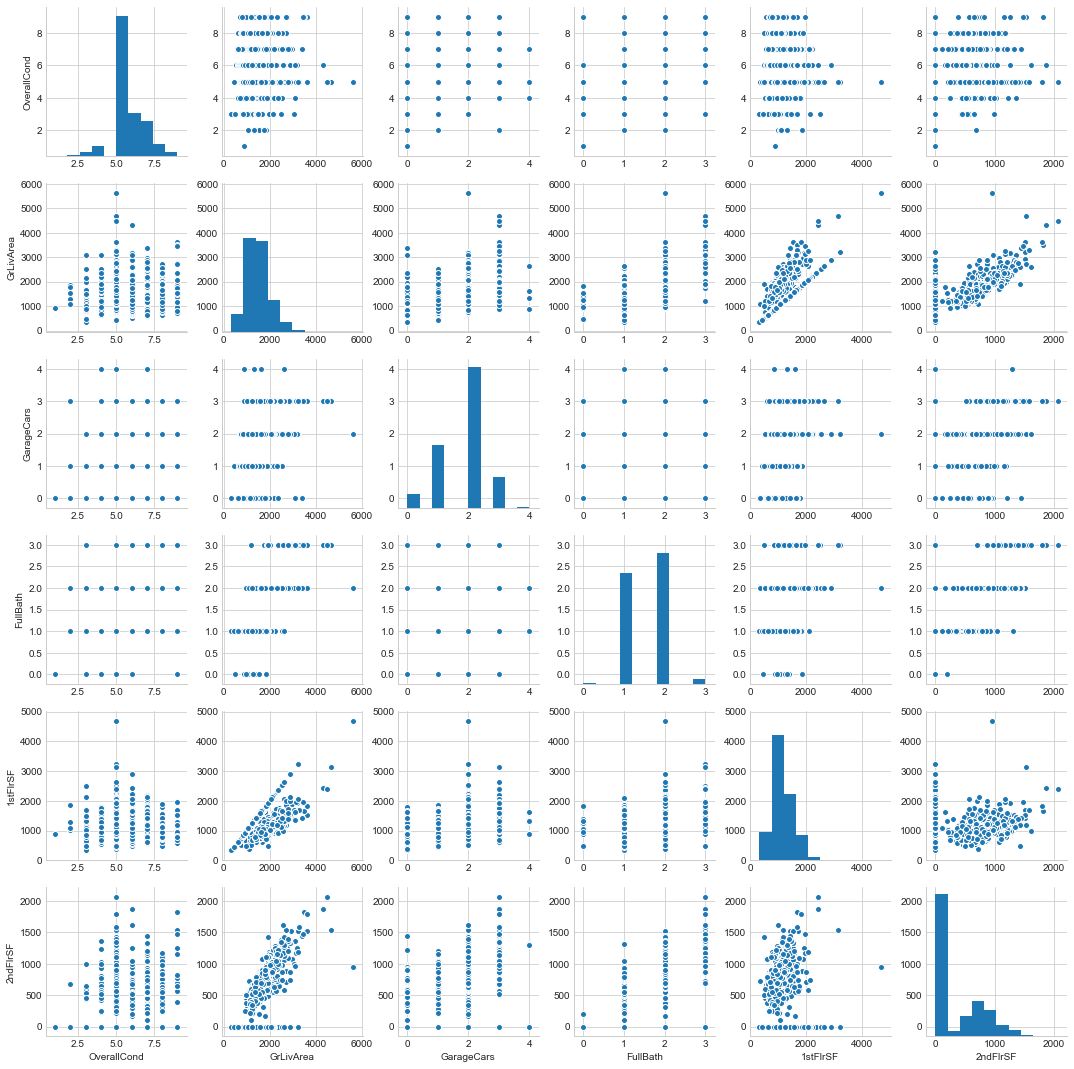

In [7]:
#plt.figure(figsize=(12,10))
interesting_cols = ["OverallCond", "GrLivArea", "GarageCars", "FullBath", "1stFlrSF", "2ndFlrSF"]
sns.pairplot(df_train[interesting_cols],dropna=True)
plt.show()

del interesting_cols

There is a linear trend between 1stFlrSF and 2ndFlrSF.  Let's plot Saleprice as a function of the two top correlated features.

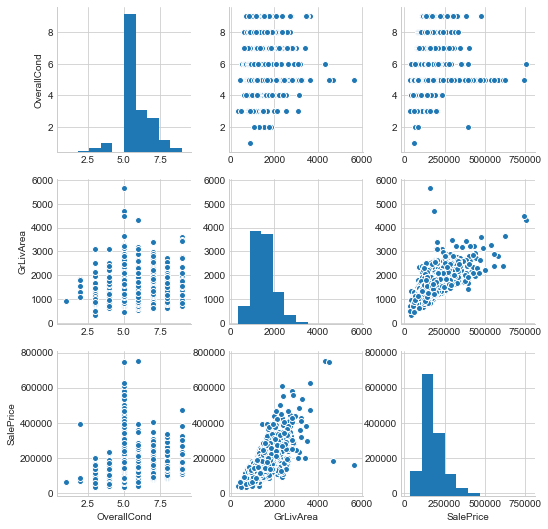

In [29]:
sns.pairplot(df_train[["OverallCond", "GrLivArea","SalePrice"]])
plt.show()

A linear trend between SalePrice and GrLivArea exists. However the variance of the error increases with the dependent variable (heteroscedacity); this could be a hint that linear models would have a hard time describing such dependency. Also, we can notice the presence of some outliers and some high leverage points. We should figure out a way to deal with these.

### Skewed Data Analysis

From the numerical analysis, we have identified that there are a few numerical variables need further analysis to identify the skewed data. We did not find any key variables those have skewed more than 75%. However, we wanted to replace the sale price with corresponding logarithmic value for the predictive models and later convert it back to the exponential value before saving the predictions. 

LowQualFinSF      9.00
GrLivArea         1.37
BsmtHalfBath      4.10
KitchenAbvGr      4.48
WoodDeckSF        1.54
OpenPorchSF       2.36
EnclosedPorch     3.09
3SsnPorch        10.29
ScreenPorch       4.12
PoolArea         14.81
MiscVal          24.45
SalePrice         1.88
dtype: float64


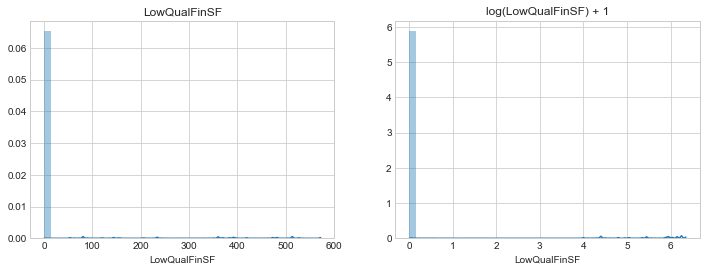

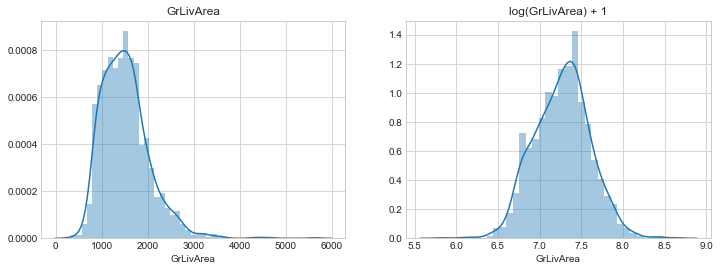

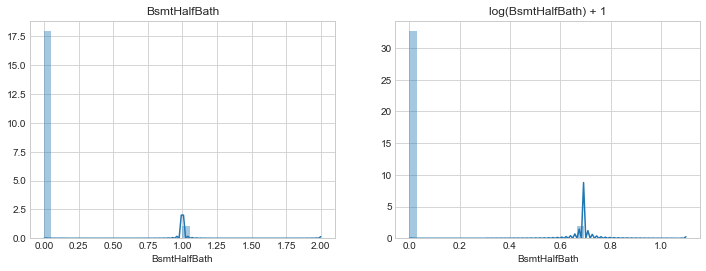

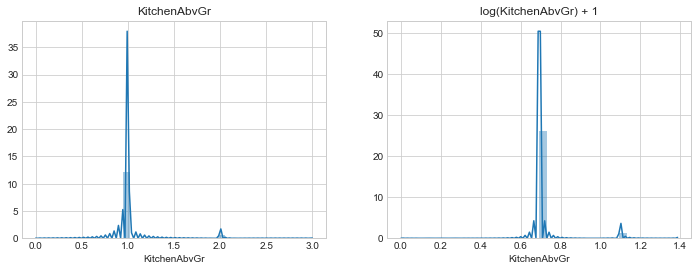

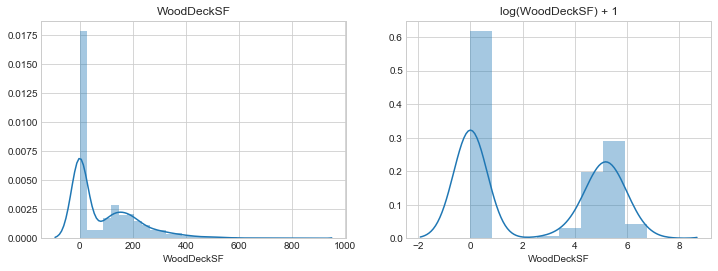

In [43]:
from scipy.stats import skew

#analyze skewed train data

numerical_features = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
numerical_features.remove('Id')

skewed = df_train[numerical_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]

print(skewed[10:])

plt.figure(figsize = (5,4))
              
for idx, val in enumerate(skewed.index[10:]):
   
    if (idx <= 4):
        log_val = np.log1p(df_train[val])

        fig, (ax1, ax2) = plt.subplots(1,2)

        sns.distplot(df_train[val], ax=ax1)
        ax1.set_title(val)

        sns.distplot(log_val, ax=ax2)
        ax2.set_title("log(" + val + ") + 1") 
    #end if    
#end for

### Categorical Analysis

In [12]:
cat_features = [f for f in df_train.columns if df_train.dtypes[f] == 'object']
print('total categorical features: {}'.format(len(cat_features)))
print(cat_features)

total categorical features: 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


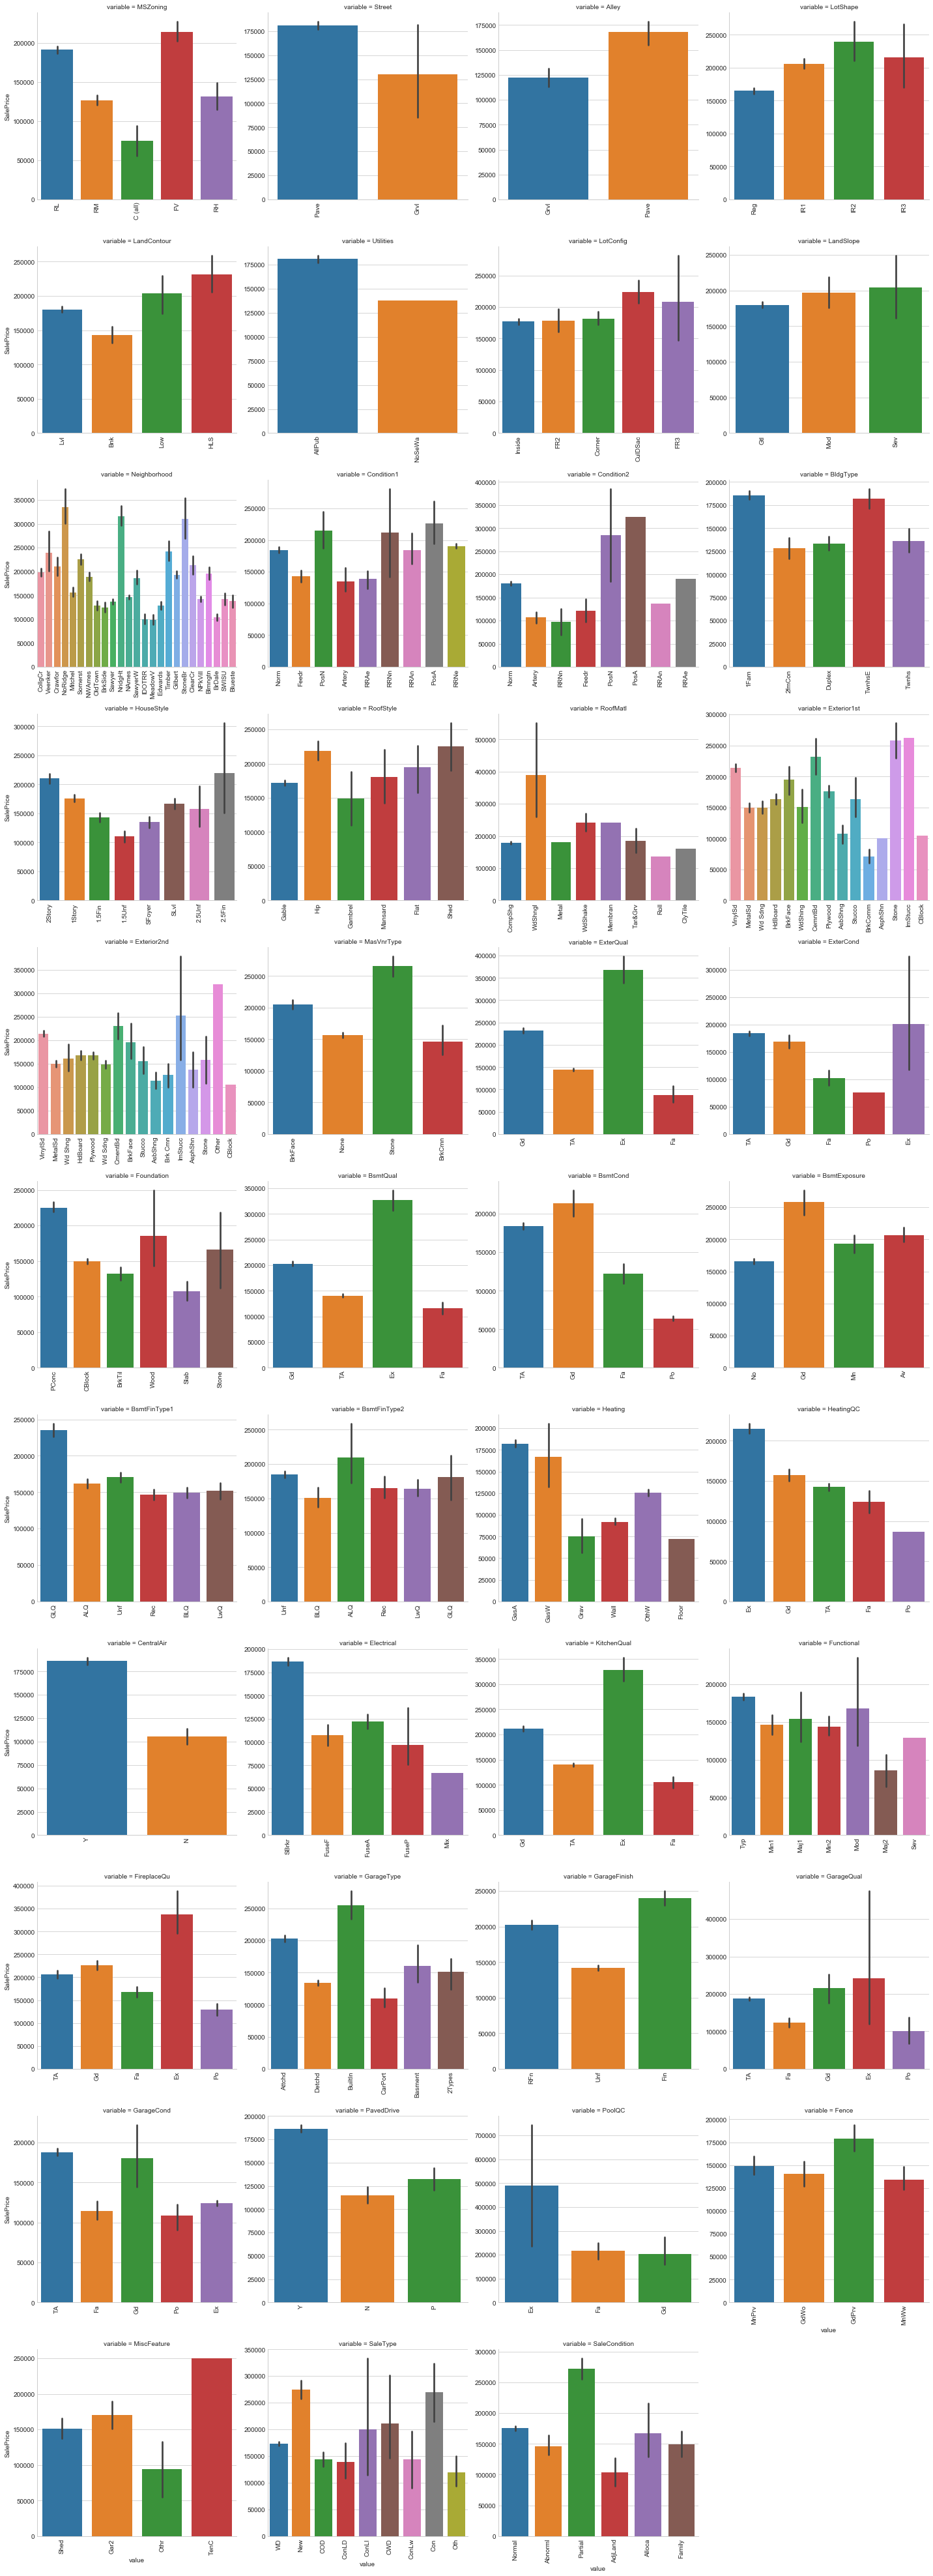

In [14]:
def barplot(x,y,**kwargs):
    sns.barplot(x=x,y=y)
    x = plt.xticks(rotation=90)
#end def
            
plt.figure(figsize = (5,3))

p = pd.melt(df_train, id_vars='SalePrice', value_vars=cat_features)
g = sns.FacetGrid (p, col='variable', col_wrap=4, sharex=False, sharey=False, size=5)
g = g.map(barplot, 'value','SalePrice')

### Analyze Sale Price Skewness

A big proportion of the categorical features present a distribution that is highly imbalanced. Finally, let's visualize the distribution of SalePrice (target variable).

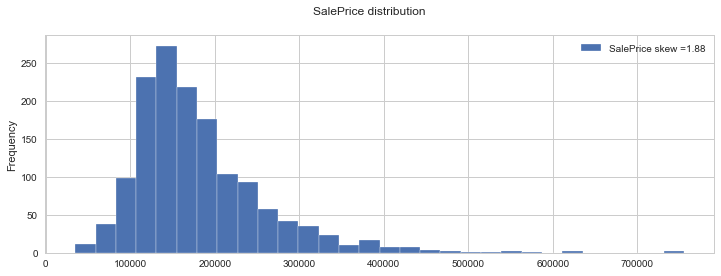

In [149]:
skewness = df_train['SalePrice'].skew()
df_train['SalePrice'].plot.hist(edgecolor='white', bins=30, 
                                label='SalePrice skew =' + str(round(skewness,2)))
plt.suptitle("SalePrice distribution")
plt.legend()
plt.show()

The distribution of SalePrice is skewed to the right. Let's apply a log transform to check if this reduces the skewness.

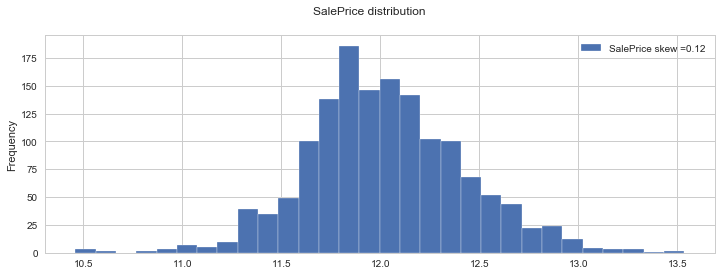

In [150]:
skewness = np.log( df_train['SalePrice']).skew()
np.log( df_train['SalePrice']).plot.hist(edgecolor='white', bins=30, 
                                label='SalePrice skew =' + str(round(skewness,2)))
plt.suptitle("SalePrice distribution")
plt.legend()
plt.show()

del skewness

Indeed skewness is considerably reduced after a log transform!

There is still a lot of room to explore the data; however, let's go ahead and produce a simple model and then reiterate to improve performance.

### Null Data Analysis

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'FireplaceQu' 'LotFrontage'
 'GarageCond' 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual'
 'BsmtExposure' 'BsmtFinType2' 'BsmtFinType1' 'BsmtCond' 'BsmtQual'
 'MasVnrArea' 'MasVnrType' 'Electrical']


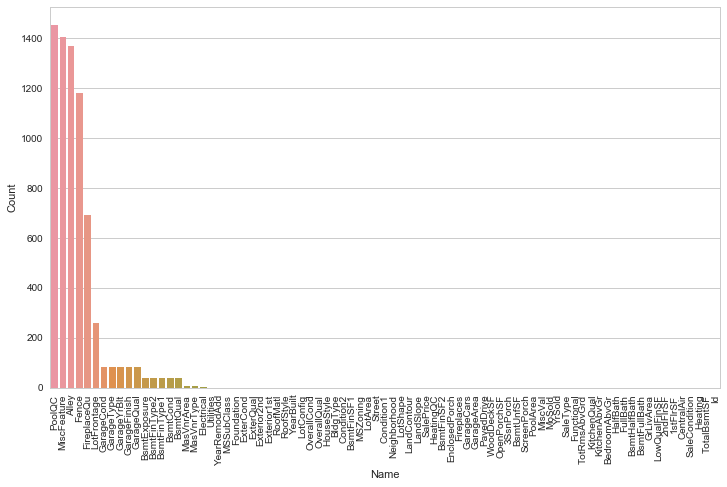

In [3]:
na = df_train.isnull().sum().sort_values(ascending=False)
print(na[na > 0]) #columns with many number of nulls
print("")
print(na[na > 0].index.values)

#visualising missing values
miss = na.to_frame()
miss.columns = ['Count']
miss.index.names = ['Name']
miss['Name'] = miss.index

plt.figure(figsize=(12,7))
sns.set(style="whitegrid", color_codes=True)
sns_plot = sns.barplot(x = "Name", y = "Count", data = miss)

plt.xticks(rotation = 90)   
plt.show()


There are 19 features in both the training and test sets that contain null values (NaN). Let's get rid of columns having more than 2/3rd of their instances missing. 

In [4]:
null_values_per_col = np.sum(df_train.drop(["Id","SalePrice"], axis=1).isnull(), axis=0)
print("Null values per columns")
print(null_values_per_col)

max_na = int(2*df_train.shape[0]/3.0)
cols_to_remove = []

for col in df_train.drop(["Id","SalePrice"],axis=1).columns.tolist():
    if null_values_per_col[col] > max_na: 
        cols_to_remove.append(col)
        df_train.drop(col, axis=1, inplace=True)
        
print("New shape of the training set is: (%d,%d)" %df_train.shape)        
print("The removed columns are:")
for column in cols_to_remove:
    print(column, "Dropped because it has %d missing values" %null_values_per_col[column])
    
print("Dropping the same columns from the test set")    
df_test.drop(cols_to_remove, axis=1, inplace=True)

print("New shape of the test set is: (%d,%d)" %df_test.shape)        

Null values per columns
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQu

Let's see how many columns containing null values we have left.

### Total Features to Impute

For the remaining columns containing null values, we'll proceed as follows with a minimal level of sophistication for the moment:

- For numerical features, we impute by replacing null values with the median of the corresponding column.
- For categorical features, we impute by filling  null values with one-hot encoding.

There are various ways to find the estimate to replace the missing value including:

• Mean: Replace missed value with the mean value of the corresponding variable

• Regression: Some predicted value by regressing missing variable on all the other variables

• Interpolation and extrapolation: An estimated value from other observations of the same variable


In [5]:
null_values_per_col = np.sum(df_train.drop(["Id","SalePrice"], axis=1).isnull(), axis=0)
print(r"There are %d"  %np.sum(null_values_per_col != 0)  + " columns to impute.\n")

cols_to_impute = []
for col_index, val in null_values_per_col.items():
    if val != 0: cols_to_impute.append(col_index)

print(r"The columns to impute are:")        
for column in cols_to_impute:
    print(column)  

There are 15 columns to impute.

The columns to impute are:
LotFrontage
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond


### Impute Categorical Features

In [6]:
imputation_val_for_na_cols = dict()
for col in cols_to_impute:
    #if (df_train[col].dtype == 'float64' ) or  (df_train[col].dtype == 'int64'):
        #imputation_val_for_na_cols[col] = np.nanmedian(df_train[col])
    #else:
        imputation_val_for_na_cols[col] = df_train[col].value_counts().argmax()

for key, val in imputation_val_for_na_cols.items():
    df_train[key].fillna(value= val, inplace = True)
    df_test[key].fillna(value = val, inplace = True)

print("Checking if everything went well ...")    
print("Number of missing values in training set after imputation and cleaning ",
          np.sum(np.sum(df_train.isnull())))    
print("Number of missing values in test set after imputation and cleaning " ,
      np.sum( np.sum(df_test.isnull())) )

del imputation_val_for_na_cols, cols_to_impute

Checking if everything went well ...
Number of missing values in training set after imputation and cleaning  0
Number of missing values in test set after imputation and cleaning  22


There are few missing values left in the test set, we will impute these using the same strategy used earlier but with the values from the test set.

In [7]:
null_test = np.sum(df_test.isnull(), axis=0) 
for col, null_vals in null_test.iteritems():
    if null_vals != 0:        
        if (df_test[col].dtype == 'float64') or  (df_test[col].dtype == 'int64'):
            df_test[col].fillna(value = np.nanmedian(df_test[col]), inplace = True)
        else:
            df_test[col].fillna(value = df_test[col].value_counts().argmax(), inplace = True)
        #end if
    #end if   
    
print("Number of missing values in test set after second round of imputation " ,
      np.sum( np.sum(df_test.isnull(), axis= 0)) )   

del null_test

Number of missing values in test set after second round of imputation  0


### Outlier Analysis

Continuing with exploratory analysis, we have analyzed the outliers using Cooks distance. Cooks distance is a measure calculated from a regression model to find out the influence exerted by each observation (row) on the predictions. As a practice, those observations that have a Cooks distance greater than 4 times the mean value may be classified as an outlier. Outlier detection can be done using univariate and multivariate analysis. In univariate model, the outliers are those observations that are present outside of 1.5 * IQR, where IQR (Inter Quartile Range) is the difference between 75th and 25th quartiles. Analyzing outliers in any observations based on single variable may lead to incorrect inferences. Cooks distance generalizes the outlier analysis using multivariate approach. The bigger the bubbles, the bigger outlier deviations from the mean value. We have further analyzed two key variables - ground live area and garage area that are in high correlation with the sale price. From the scatter plot, we can see that garage live area has 4 outliers with values greater than 4,000 sq ft. We can also visualize 4 outliers in garage area scatter plot with values greater than 1,200 sq ft.

We remove the 8 outlier rows related to these two variables from the training dataset.

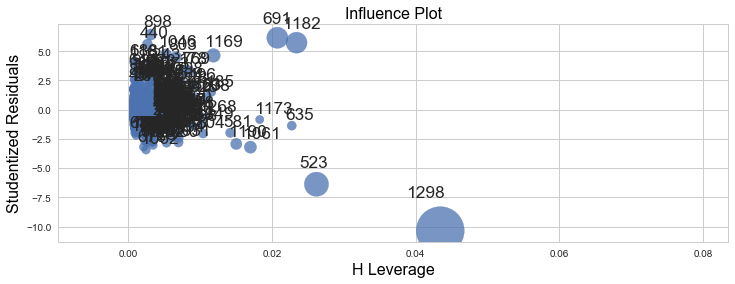

In [13]:
#for outlier analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula = "SalePrice ~ GrLivArea + GarageArea", data=df_train)
fitted = model.fit()    

plot = sm.graphics.influence_plot(fitted, criterion="cooks")

We will delete the outlier rows from two key variables - GrLivArea and GarageArea

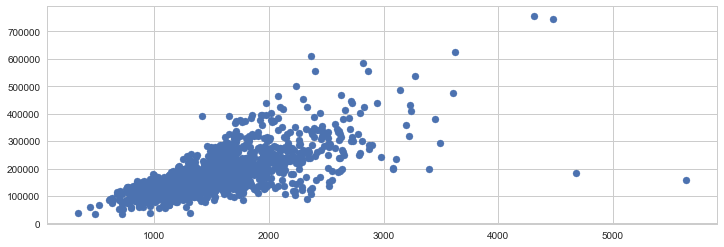

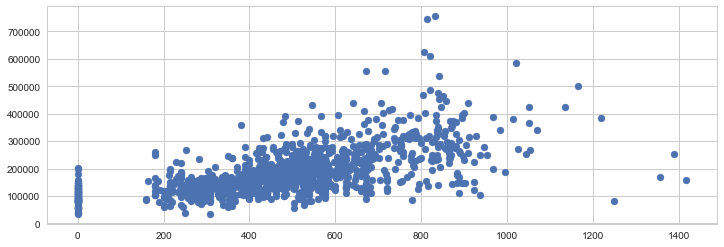

In [14]:
plot = plt.figure()
plt.scatter(x= df_train['GrLivArea'], y= df_train["SalePrice"])  
      
plot = plt.figure()
plt.scatter(x= df_train['GarageArea'], y= df_train["SalePrice"]) 

In [8]:
before = df_train.shape[0]

# fix all extreme outliers based on outlier analysis
# 8 rows will be deleted
df_train = df_train[df_train.GrLivArea <= 4000]
df_train = df_train[df_train.GarageArea <= 1200]

after = df_train.shape[0]
print('total of {} rows being deleted'.format(before - after))

total of 8 rows being deleted


# ML Pipeline Components

## Categorical Encoder

Some of the categorical variables are ordinal. When we convert this category variable into numeric encoding, we need to retain the fact that there is an implicit order within the values.

There are a few other encoding techniques, such as one-hot, binary, polynomial and helmert to factorize categorical variables. We will use ordinal and one-hot encoding techniques for this dataset.

One-hot Encoding: One-hot encoding converts the category variable into many binary vectors, one new numeric variable for each value in the category.

Following are a few categorical variables converted to numerical:

- Lot shape is encoded as: 1 - regular, 2 - Irregular-I, 3 - Irregular-II, 4 - Irregular-III

- Alley is encoded as: 1 - none, 2 - gravel, 3 - paved

- All quality variables such as garage quality are encoded as: 0 - none, 1 - poor, 2 - fair 3 - typical 4 - good, 5 - excellent

- Building type is encoded as: 1 - single-family, 2 - two-family, 3 - duplex, 4 - townhouse end unit, 5 - townhouse inside unit

- Overall quality is encoded as: 1 to 3 - bad, 4 to 6 - average, 7 to 10 - good

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='ignore'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

### Test Categorical Encoding

In [10]:
categorical_features = []
is_categorical = df_train.dtypes == 'object'
for col in df_train.columns.tolist():
    if is_categorical[col]: categorical_features.append(col)
#end for

#print(categorical_features)
cat_encoder = CategoricalEncoder()
housing_cat_reshaped = df_train[categorical_features].values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)

cat_enc_features = cat_encoder.categories_
#print(cat_enc_features)
print('total categorical features before encoding: {}'.format(len(categorical_features)))
print('total categorical features after encoding: {}'.format(len(cat_enc_features[0])))

total categorical features before encoding: 39
total categorical features after encoding: 166


## Feature Engineering

Feature engineering is a technique to analyze all the variables those influence target variable for better predictions. Part of feature engineering, we may need to create new features to make the data to be more expressive. One of the key intents, in analyzing categorical variables, is to convert them into numerical factors as most of the machine learning algorithms expect all the variables to be numeric for them to work more effectively. Feature engineering is a difficult task; majority of the effort is manual and requires lots of domain knowledge.

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class FeatureEngineering(BaseEstimator, TransformerMixin):
    """Takes in dataframe, adds/removes features"""

    def __init__(self, column_names=[]):
        self.new_features_ = []
        pass
    #end def

    def transform(self, df, y=None): 
        #add new features
        df_new = df.copy()
        
        df_new["YearsSinceRemodel"] = df["YrSold"] - df["YearRemodAdd"]

        df_new["Remodeled"] = (df["YearRemodAdd"] != df["YearBuilt"]) * 1

        df_new["RecentRemodel"] = (df["YearRemodAdd"] == df["YrSold"]) * 1

        df_new["VeryNewHouse"] = (df["YearBuilt"] == df["YrSold"]) * 1

        df_new["Age"] = 2010 - df["YearBuilt"]
        df_new["TimeSinceSold"] = 2010 - df["YrSold"]

        df_new["SeasonSold"] = df["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 
                                                      6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)

               
        df_new["IsRegularLotShape"] = (df["LotShape"] == 1) * 1

        # Most properties are level; bin the other possibilities together
        # as "not level".
        df_new["IsLandLevel"] = (df["LandContour"] == 0) * 1

        # Most land slopes are gentle; treat the others as "not gentle".
        df_new["IsLandSlopeGentle"] = (df["LandSlope"] == 1) * 1

        # Most properties use standard circuit breakers.
        df_new["IsElectricalSBrkr"] = (df["Electrical"] == 5) * 1

       
        # Most have a paved drive. Treat dirt/gravel and partial pavement
        # as "not paved".
        df_new["IsPavedDrive"] = (df["PavedDrive"] == 1) * 1
        
        df_new["Has2ndFloor"] = (df["2ndFlrSF"] == 0) * 1
        df_new["HasMasVnr"] = (df["MasVnrArea"] == 0) * 1
        df_new["HasWoodDeck"] = (df["WoodDeckSF"] == 0) * 1
        df_new["HasOpenPorch"] = (df["OpenPorchSF"] == 0) * 1
        df_new["HasEnclosedPorch"] = (df["EnclosedPorch"] == 0) * 1
        df_new["Has3SsnPorch"] = (df["3SsnPorch"] == 0) * 1
        df_new["HasScreenPorch"] = (df["ScreenPorch"] == 0) * 1

        # Months with the largest number of deals may be significant.
        df_new["HighSeason"] = df["MoSold"].replace( 
            {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})

        df_new["NewerDwelling"] = df["MSSubClass"].replace(
            {20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,
             90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})   
        
        area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                     'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
                     'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]

        df_new["TotalArea"] = df[area_cols].sum(axis=1)

        df_new["TotalArea1st2nd"] = df["1stFlrSF"] + df["2ndFlrSF"]       
        
        self.new_features_ = list(set(df_new.columns) - set(df.columns))
        
        print('...in feature engineering')
        return df_new
    #end def

    def fit(self, df, y=None):    
        return self
    #end def
#end of class

### Test Feature Engineering

In [12]:
before = df_train.shape[1]

X = df_train.copy()
feature_engineering = FeatureEngineering()
housing_with_feature_engineering = feature_engineering.fit_transform(X)

after = housing_with_feature_engineering.shape[1]

#print(housing_with_feature_engineering.columns)
print(feature_engineering.new_features_)
print("")
print("")
print('total of {} new features being created through feature engineering'.format(after - before))

...in feature engineering
['TotalArea1st2nd', 'YearsSinceRemodel', 'TimeSinceSold', 'HasOpenPorch', 'Remodeled', 'Has3SsnPorch', 'Age', 'NewerDwelling', 'IsLandSlopeGentle', 'IsRegularLotShape', 'HasWoodDeck', 'VeryNewHouse', 'IsLandLevel', 'SeasonSold', 'HasEnclosedPorch', 'RecentRemodel', 'TotalArea', 'IsElectricalSBrkr', 'HasScreenPorch', 'HighSeason', 'HasMasVnr', 'Has2ndFloor', 'IsPavedDrive']


total of 23 new features being created through feature engineering


## DataFrame Selector

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    #end def
    
    def fit(self, X, y=None):
        return self
    #end def
    
    def transform(self, X):
        return X[self.attribute_names].values
    #end def
#end class

## Top N Feature Selector

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

# Evaluation Metrics

** Mean Absolute Error (MAE) **: The Mean Absolute Error (or MAE) is the sum of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were. The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).


** Mean Squared Error (MSE) **: The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error.

** Root Mean Squared Error (RMSE) **: Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE).

** R^2 Metric **: The R^2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination. This is a value between 0 and 1 for no-fit and perfect fit respectively.



In [16]:
from sklearn import metrics

def score(y, y_pred):
    MAE = metrics.mean_absolute_error(y, y_pred)
    MSE = metrics.mean_squared_error(y, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y, y_pred))
    R2 = metrics.explained_variance_score(y,y_pred)
    
    print('MAE = ',MAE)
    print('MSE = ',MSE)
    print('RMSE = ',RMSE)
    print('R^2 = ',R2)
    
    return MAE, MSE, RMSE, R2
#end def

# Build the ML pipeline

Let's build the base pipeline to clean the numerical and categorical features and apply feature engineering. Create a clean training and test data sets from this base pipeline.

Convert the Sale Price onto log values to fix the skewness.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion

def create_pipeline(num_features, cat_features):
    num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_features)),        
            ('imputer', Imputer(strategy="median")),        
            ('std_scaler', StandardScaler()),
        ])

    cat_pipeline = Pipeline([
            ('selector', DataFrameSelector(cat_features)),            
            ('cat_encoder', CategoricalEncoder(encoding="onehot-dense"))                   
        ])

    base_pipeline = FeatureUnion(transformer_list=[        
            ("num_pipeline", num_pipeline),        
            ("cat_pipeline", cat_pipeline)        
        ])

    full_pipeline = Pipeline([              
            ("feature_engineering",FeatureEngineering()),
            ("preparation", base_pipeline),           
        ])
    
    return full_pipeline, cat_pipeline
#end def


In [18]:
X, y = df_train.drop(["Id","SalePrice"], axis = 1),np.log(df_train["SalePrice"])

num_features =  [f for f in X.columns if ((X[f].dtype == 'float64') or 
                                                      (X[f].dtype == 'int64'))]

cat_features = [f for f in X.columns if (X.dtypes[f] == 'object')]

train_full_pipeline, train_cat_pipeline = create_pipeline(num_features,cat_features)

X_clean = train_full_pipeline.fit_transform(X)
print('X_clean: {}'.format(X_clean.shape))

catgories = train_cat_pipeline.named_steps["cat_encoder"].categories_
all_cat_features = np.concatenate(catgories).ravel()

all_features = []
all_features.extend(num_features)
all_features.extend(all_cat_features)

print('count of all training data features: {}'.format(len(all_features)))

#convert pipeline fit_transform output to data-frame:
index = ['Row'+str(i) for i in range(1, len(X_clean)+1)]

X_clean = pd.DataFrame(data = X_clean, index=index, columns =all_features)
print('training data set after base pipeline X_clean: {}'.format(X_clean.shape))
print('y: {}'.format(y.shape))


...in feature engineering
X_clean: (1452, 273)
count of all training data features: 273
training data set after base pipeline X_clean: (1452, 273)
y: (1452,)


In [19]:
X_test = df_test.drop("Id", axis = 1)

num_features =  [f for f in X_test.columns if ((X_test[f].dtype == 'float64') or 
                                                      (X_test[f].dtype == 'int64'))]

cat_features = [f for f in X_test.columns if (X_test.dtypes[f] == 'object')]

test_full_pipeline,test_cat_pipeline = create_pipeline(num_features,cat_features)

X_test_clean = test_full_pipeline.fit_transform(X_test)
print('X_test_clean: {}'.format(X_test_clean.shape))

catgories = test_cat_pipeline.named_steps["cat_encoder"].categories_
all_cat_features = np.concatenate(catgories).ravel()

test_all_features = []
test_all_features.extend(num_features)
test_all_features.extend(all_cat_features)

print('count of all test data features: {}'.format(len(test_all_features)))

#convert pipeline fit_transform output to data-frame:
index = ['Row'+str(i) for i in range(1, len(X_test_clean)+1)]

X_test_clean = pd.DataFrame(data = X_test_clean, index=index, columns =test_all_features)
print('test dataset after base pipeline X_test_clean: {}'.format(X_test_clean.shape))

# Get missing columns in the training test
missing_cols = set( X_clean.columns ) - set( X_test_clean.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test_clean[c] = 0
    
print('test dataset after filling the missed columns: {}'.format(X_test_clean.shape))



...in feature engineering
X_test_clean: (1459, 259)
count of all test data features: 259
test dataset after base pipeline X_test_clean: (1459, 259)
test dataset after filling the missed columns: (1459, 268)


### Dimensionality Reduction

The linear regression model's performance is sub-optimal at best with R-squared of just 0.64. This could be an indication that the data is not linearly separable, so I will try univariate feature selection to feed into a non-linear model: Random Forest.

If we take the univariate approach of selecting variables based on its level of association with the target, the class SelectPercentile provides an automatic procedure for keeping only a certain percentage of the best, associated features.

Key metrics to measure are:

**f_regression**: Used only for numeric targets and based on linear regression performance.

**f_classif**Used only for categorical targets, based on Analysis of Variance (ANOVA) statistical test.

**chi2**: Performs the chi-square statistic for categorical targets, which is less sensible to the nonlinear relationship between the predictive variable and its target.

In [20]:
# Select top 20% of features

# Feature Selector
from sklearn.feature_selection import SelectPercentile, f_regression

# Instantiate object
selector_f = SelectPercentile(f_regression, percentile=20)

# Fit and transform
x_best = selector_f.fit_transform(X_clean, y)

### Statistical Significance

In choosing the percentile cutoff, I took a Pareto 80/20 approach and selected the top 20% best, associated features. However, I'll review the F-score and p-values to confirm that 20% is an appropriate percentile to exclude a feature from participating in the learning process.

In [21]:
support = np.asarray(selector_f.get_support())

# Supress displaying long numbers in scientific notation
#pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Enable scientific notation
pd.set_option('display.float_format', '{:.2e}'.format)

# Column names of top 20%
features = np.asarray(all_features) #np.asarray(X_train.columns.values)
features_with_support = features[support]

# print('Top 20% of the best, associated features to SalePrice\n',columns_with_support)
# print('Number of Features:', len(columns_with_support))

#f-scores of top 20%
fscores = np.asarray(selector_f.scores_)
fscores_with_support = fscores[support]

# p-values of top 20%
pvalues = np.asarray(selector_f.pvalues_)
pvalues_with_support = pvalues[support]

# Dataframe of top 20%
top20 = pd.DataFrame({'F-score':fscores_with_support,
                      'p-value':pvalues_with_support},
                     index = features_with_support)
# top20.index.name = 'Feature'
print('Top 20% best associated features to SalePrice\nNumber of features:',len(features_with_support))
print(top20.sort_values(by = 'p-value', ascending = 'True'))


Top 20% best associated features to SalePrice
Number of features: 55
              F-score   p-value
OverallQual  2.95e+03  0.00e+00
GrLivArea    1.54e+03 1.81e-230
GarageCars   1.28e+03 1.19e-201
GarageArea   1.17e+03 3.39e-188
TotalBsmtSF  1.01e+03 2.19e-168
1stFlrSF     8.70e+02 4.01e-150
TA           8.08e+02 1.41e-141
FullBath     7.76e+02 3.98e-137
YearBuilt    7.65e+02 1.63e-135
Unf          7.26e+02 6.47e-130
YearRemodAdd 6.88e+02 2.06e-124
TA           5.92e+02 6.51e-110
TA           5.90e+02 1.10e-109
TotRmsAbvGrd 5.78e+02 1.01e-107
PConc        5.66e+02 6.84e-106
Gd           5.27e+02  1.06e-99
Fireplaces   4.49e+02  4.22e-87
Ex           4.01e+02  6.66e-79
Ex           3.79e+02  3.84e-75
GLQ          3.43e+02  6.14e-69
MasVnrArea   3.15e+02  6.44e-64
Gd           3.07e+02  1.94e-62
Fin          3.01e+02  1.90e-61
GarageYrBlt  2.88e+02  4.52e-59
Ex           2.81e+02  1.04e-57
None         2.59e+02  9.47e-54
Detchd       2.57e+02  2.64e-53
BsmtFinSF1   2.46e+02  2.39e-51
N  

The top 20% of features are all statistically significant as their p-values are far under .05. This further confirms that these features will be good to use in predicting SalePrice.

### Remove Duplicate Features

There are a few variables that are highly correlated (correlation >.80) with one another . The features representing redundant information and are less correlated with SalePrice can also be removed for further dimentionality reduction.

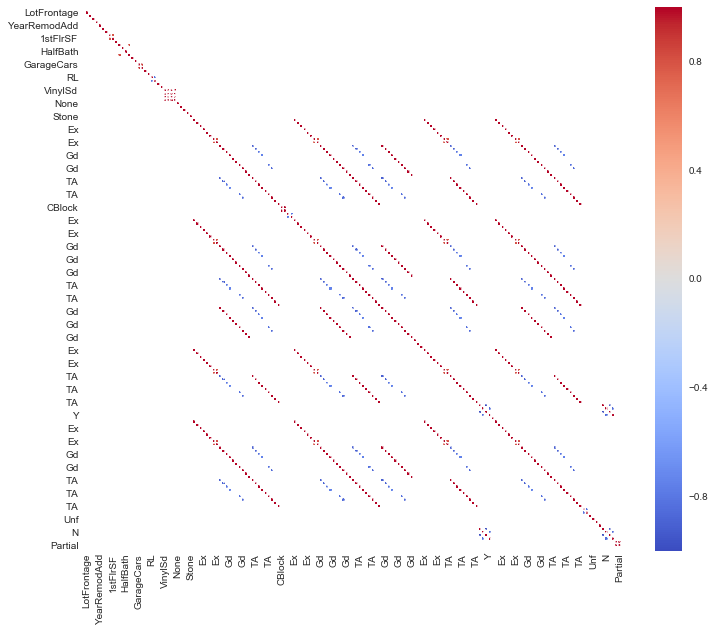

In [22]:
#print(X_clean[features_with_support])

X_best_features = X_clean[features_with_support]
corr =X_best_features.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [23]:
# Correlations to SalePrice
from scipy import stats

print('Correlation to SalePrice')
print('GrLivArea:',stats.pearsonr(X_best_features['GrLivArea'],y)[0])
print('TotRmsAbvGrd:',stats.pearsonr(X_best_features['TotRmsAbvGrd'],y)[0])

print('--'*20)
print('GarageCars:',stats.pearsonr(X_best_features['GarageCars'],y)[0])
print('GarageArea:',stats.pearsonr(X_best_features['GarageArea'],y)[0])

Correlation to SalePrice
GrLivArea: 0.718031168273
TotRmsAbvGrd: 0.533773319704
----------------------------------------
GarageCars: 0.684961822796
GarageArea: 0.667846708193


Removing Duplicated Features

GrLivArea vs TotRmsAbvGrd
These features are highly correlated with a correlation of 0.83. Of these two variables, TotRmsAbvGrd will be removed because it has a lower correlation with SalePrice.

Garage Cars vs Garage Area
Garage Cars and GarageArea are also highly correlated as indicated by their correlation coefficient of 0.88. GarageArea will be removed as it has a lower correlation with our target variable, SalePrice.

In [24]:
# Remove redundant features
X_best_features = X_best_features.drop(['TotRmsAbvGrd','GarageArea'], axis = 1)
X_best_features = X_best_features.loc[:,~X_best_features.columns.duplicated()]
X_best_features.columns
print(len(X_best_features.columns))


41


In [25]:
X_test_clean = X_test_clean[X_best_features.columns]
X_test_clean = X_test_clean.loc[:,~X_test_clean.columns.duplicated()]
print(len(X_test_clean.columns))

41


# Create Cross-Validation dataset

Split the training dataset into two parts - training and cross-validation in the ratio of 70-30.

In [26]:
#X, y = df_train.drop(["Id","SalePrice"], axis = 1),np.log(df_train["SalePrice"])
X = X_best_features

X_test = X_test_clean

#create cross-validation dataset from training
seed = 7
val_split = 0.3
X_train, X_val, y_train, y_val  = train_test_split(X, y, test_size = val_split, random_state = seed)

#  ML Pipeline of algorithms 

** Ridge, Lasso, SVM, RF, XGB**

** Underfitting and Overfitting **: Underfitting happens when the model is trivial and does not fit the data properly. As a result it is unable to learn the model properly
hence gives incorrect predictions. Underfitting suffers from low variance but high bias from the predicted model. Variance measures the variation in learning from different training sets. Variance does not properly filter outliers that are part of the model. Bias prevents generalization beyond the training dataset. Overfitting occurs when the predicted model learns the training dataset including the noise and results negatively impacting the performance and accuracy of the model. Overfitting happens more likely with non-linear and non-parametric algorithms those offer more flexibility. Overfitting, as expected, exhibits low bias and high variance. Balancing between bias and variance is a challenge and model may have to compromise one over the other.

** Cross Validation **:Before applying the trained model onto the testing dataset, we need to validate it. Cross-validation is a technique to validate the trained model by partitioning the original training dataset into two parts - training and cross validation datasets. The cross validation dataset is basically to evaluate the trained model before applying on the actual test dataset. Usually 70% of the original training dataset is kept for training the model and 30% of it for cross validation.
This type of cross validation is called holdout method. K-fold cross validation is more improved and effective cross validation method, where the dataset is divided into k subsets, and the holdout method is repeated k times. In each iteration, one of the k subsets is selected as a test dataset and the remaining k-1 subsets will be part of the training dataset. In the end, the average error across all k attempts is computed.

** Model Evaluation **: We can use evaluation metrics to check accuracy of the trained model. Accuracy, precision, recall and f-score are typical metrics used to evaluate the classification models. Regression models use mean absolute error (MAE), root mean squared error (RMSE), coefficient of determination and relative scored error (RSE) as metrics to verify the accuracy and performance of the model. MAE evaluates how close the predictions are to the actual target variable, hence
a lower score is better. RMSE metric summarizes the error in predicted model. By squaring the error, the over and under predictions are controlled. RSE normalizes the total squared error by diving the total squared error of the actual target variable values. Coefficient of determination represents the prediction as value between 0 and 1; 0 - means the model is random and 1 - means the model is a good fit.

In [27]:
import time

pipelines = []

pipelines.append(("Ridge_Pipeline", 
                 Pipeline([                     
                     ("Ridge", Ridge(random_state=seed))])))

pipelines.append(("Lasso_Pipeline", 
                 Pipeline([                         
                         ("Lasso", Lasso(random_state=seed, alpha=0.01))])))

pipelines.append(("SVM_Pipeline",
                 Pipeline([                     
                     ("SVR", SVR())])))

pipelines.append(("RF_Pipeline",
                 Pipeline([                     
                     ("RF", RandomForestRegressor(random_state=seed))])))

pipelines.append(("XGB_Pipeline",
                  Pipeline([                      
                      ("XGB", XGBRegressor(seed=seed))])))


In [28]:
scoring = 'r2'
n_folds = 10
results, names  = [], [] 

table = pd.DataFrame(columns=["Algorithm", "MAE", "MSE", "RMSE", "R^2"])

for name, model  in pipelines:
 
    print("*** {}".format(name))
    
    start = time.clock()
    
    model.fit(X_train, y_train)
    y_train_predicted = model.predict(X_train)
    
    end = time.clock()
    print("train-time: %.2gs" % (end-start))
       
    print('predicted sale prices - training dataset')
    print(y_train_predicted)
    
    MAE, MSE, RMSE, R2 = score(y_train, y_train_predicted)
                
    print("***")
    print("")                                   
    
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "Cross-Validation - %s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
   
    table.loc[len(table)] = [name, ('%2.3f' % MAE), ('%2.3f' % MSE),('%2.3f' % RMSE),('%2.3f' % R2)]
    
    print(msg)    
    print("")    
    print("")
    
#end for

#results = pd.DataFrame(np.array(results).T, columns = names)    
#sns.boxplot(results)
#plt.show()

print(table)


*** Ridge_Pipeline
train-time: 0.052s
predicted sale prices - training dataset
[ 12.48264784  11.97383653  12.60475269 ...,  11.83715234  11.8208377
  12.27658148]
MAE =  0.0884993885963
MSE =  0.0150751369579
RMSE =  0.122780849313
R^2 =  0.905562533615
***

Cross-Validation - Ridge_Pipeline: 0.892628 (+/- 0.022428)


*** Lasso_Pipeline
train-time: 0.0032s
predicted sale prices - training dataset
[ 12.45120725  11.93479737  12.59929849 ...,  11.80775841  11.81655329
  12.23725463]
MAE =  0.0950554721254
MSE =  0.0180158297303
RMSE =  0.134223059607
R^2 =  0.887140705965
***

Cross-Validation - Lasso_Pipeline: 0.879655 (+/- 0.024935)


*** SVM_Pipeline
train-time: 0.07s
predicted sale prices - training dataset
[ 12.43836346  12.02771993  12.70603503 ...,  11.87070416  11.79785044
  12.23835771]
MAE =  0.0711906857843
MSE =  0.00918958196757
RMSE =  0.0958623073349
R^2 =  0.942451783408
***

Cross-Validation - SVM_Pipeline: 0.873783 (+/- 0.041613)


*** RF_Pipeline
train-time: 0.15s
pre

## ** Algorithm Success / Fail Analysis **:

Lasso performed badly; this is not surprising because linear models break down when some assumptions are not met. Ridge performs decently but the CV scores present a wide distribution.

XGBoost outperforms all the other models. In general, it should be noted that ensemble methods do a very good job relatively to linear models and Support Vector Regression. 

We will proceed with RF and XGB to illustrate hyperparameter tuning and CV and before that we will do the statistical significance test.


# Statistical Significance Test

**Baseline vs. challenger**

Let's create baseline algorithm using SVM and compare the two best algorithms: Random Forest and XGB with the baseline.

## Compare with Baseline (SVM) and XGB

In [29]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
#end def

scoring = 'neg_mean_squared_error'
n_folds = 10

kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)

svm_score = cross_val_score(SVR(), X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)   

control = svm_rmse_scores = np.sqrt(-svm_score)
display_scores(svm_rmse_scores)

print("")
print("")
print('statistical significance of Random Forest regression with baseline (SVM)')

xgb_score = cross_val_score(XGBRegressor(seed=seed), X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)   

treatment = xgb_rmse_scores = np.sqrt(-xgb_score)

treatment = xgb_rmse_scores = np.sqrt(-xgb_rmse_scores)
display_scores(xgb_rmse_scores)

#paired t-test; two-tailed p-value (aka two-sided)
(t_score, p_value) = stats.ttest_rel(control, treatment)
print("The p-value is %0.5f for a t-score of %0.5f." %(p_value, t_score))

if p_value > 0.05/2:  #Two sided 
    print('There is no significant difference between the baseline (SVM) and XGB')
else:
    print('The two algorithms are different (reject H0) \n(t_score, p_value) = (%.2f, %.5f)'%(t_score, p_value) )
    if t_score < 0.0:
        print('SVM is better than XGB')
    else:
        print('XGB is better than SVM')

Scores: [ 0.10922357  0.14737679  0.18413112  0.12414697  0.14500248  0.10999386
  0.1490578   0.10889791  0.16301313  0.14394192]
Mean: 0.138478556323
Standard deviation: 0.0238689168023


statistical significance of Random Forest regression with baseline (SVM)
Scores: [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
Mean: nan
Standard deviation: nan
The p-value is nan for a t-score of nan.
The two algorithms are different (reject H0) 
(t_score, p_value) = (nan, nan)
XGB is better than SVM


## Compare with Baseline (SVM) and Random Forest

In [30]:
from sklearn.model_selection import cross_val_score

rf_score = cross_val_score(RandomForestRegressor(random_state=seed), X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)   

treatment = rf_rmse_scores = np.sqrt(-rf_score)

display_scores(rf_rmse_scores)

#paired t-test; two-tailed p-value (aka two-sided)
(t_score, p_value) = stats.ttest_rel(control, treatment)
print("The p-value is %0.5f for a t-score of %0.5f." %(p_value, t_score))

if p_value > 0.05/2:  #Two sided 
    print('There is no significant difference between the baseline (SVM) and Random Forest')
else:
    print('The two algorithms are different (reject H0) \n(t_score, p_value) = (%.2f, %.5f)'%(t_score, p_value) )
    if t_score < 0.0:
        print('SVM is better than Randome Forest')
    else:
        print('Random Forest is better than SVM')

Scores: [ 0.1345304   0.16364153  0.1540919   0.15288538  0.17208237  0.13505873
  0.12640062  0.13687656  0.15275504  0.18580471]
Mean: 0.151412726274
Standard deviation: 0.0177766893661
The p-value is 0.13165 for a t-score of -1.65821.
There is no significant difference between the baseline (SVM) and Random Forest


# Best Models using RF and XGB

## Random Forest - Hyperparameter Tuning

In [31]:
rf_pipeline = pipelines[3][1]
print(rf_pipeline)

param_grid_rf =  [ { 
        'RF__n_estimators': [2500],          
        'RF__max_depth': np.arange(5,15,2),
        'RF__max_features': [ 'sqrt'] ,
        'RF__min_samples_leaf': [0.04]
       }]

grid_rf = GridSearchCV(estimator=rf_pipeline,
                               param_grid= param_grid_rf,
                               scoring= 'neg_mean_squared_error',
                               cv = KFold(n_splits= 3, random_state= seed, shuffle=True),
                               verbose = 1 )
# Fit grid
grid_rf.fit(X_train, y_train)

# Best score and best parameters
print('-------Best score----------')
print(grid_rf.best_score_ )
print('-------Best params----------')
print(grid_rf.best_params_)         

Pipeline(memory=None,
     steps=[('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=7, verbose=0, warm_start=False))])
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.2min finished


-------Best score----------
-0.0348236938004
-------Best params----------
{'RF__max_depth': 9, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 0.04, 'RF__n_estimators': 2500}


## Learning Curve of Random Forest

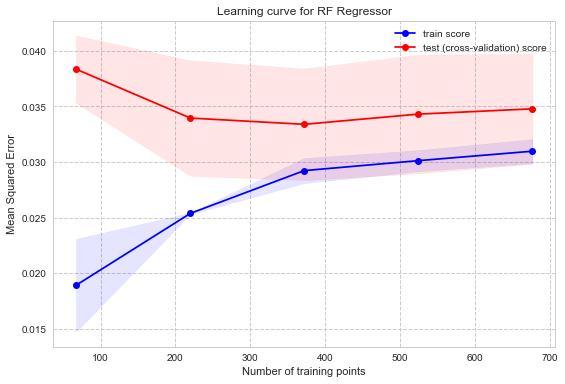

In [65]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_scores = -train_scores
    test_scores = -test_scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test (cross-validation) score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel(r'Mean Squared Error')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show() 
#def
    
# Plot the learning curve
plt.figure(figsize=(9,6))
train_sizes, train_scores, test_scores = learning_curve(
                                            grid_rf.best_estimator_ , X= X_train, y = y_train, 
                                            cv= 3,  scoring='neg_mean_squared_error')

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for RF Regressor')    

## Modeling using Best Estimator

In [55]:
rf_best_model = clone(grid_rf.best_estimator_)
rf_best_model.fit(X_train, y_train)
y_train_pred = rf_best_model.predict(X_train)

MAE, MSE, RMSE, R2 = score(y_train, y_train_pred)


MAE =  0.119630742024
MSE =  0.0316009495508
RMSE =  0.177766559147
R^2 =  0.802037429937


## Evaluate Best Model on the Hold-out Set

In [56]:
y_val_pred = rf_best_model.predict(X_val)
MAE, MSE, RMSE, R2 = score(y_val, y_val_pred)

MAE =  0.122590374537
MSE =  0.0330710684095
RMSE =  0.181854525403
R^2 =  0.777060632905


## Residual Plot of Hold-out Set

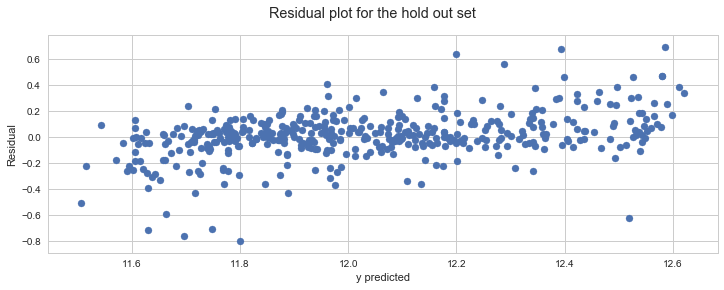

In [51]:
plt.scatter(y_val_pred, y_val - y_val_pred)
plt.suptitle("Residual plot for the hold out set")
plt.xlabel("y predicted")
plt.ylabel("Residual")
plt.show()

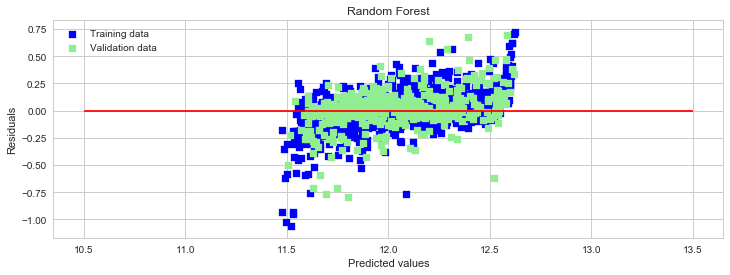

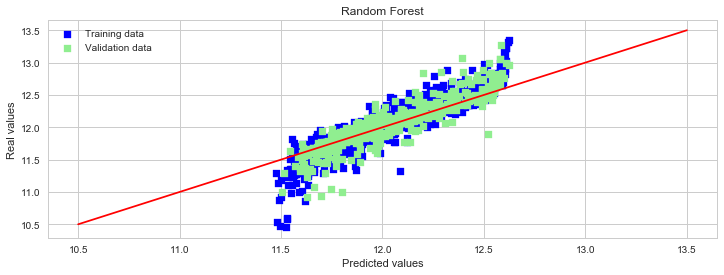

In [52]:
# Plot residuals
plt.scatter(y_train_pred, y_train - y_train_pred, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_pred, y_val - y_val_pred, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Random Forest")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_pred, y_val, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Random Forest")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## RF - Predict the Target for the Test Set

In [57]:
y_test_pred = rf_best_model.predict(X_test)
y_test_pred = np.exp(y_test_pred)

random_forest_prediction = pd.DataFrame({ "Id": df_test["Id"].values, "SalePrice": y_test_pred })

random_forest_prediction.to_csv("kaggle_python_random_forest.csv", index= False)
print('Random Forest Predictions CSV file saved to disk')

Random Forest Predictions CSV file saved to disk


## XGB - Hyperparameter Tuning

In order to decide on boosting parameters, we need to set some initial values of other parameters. Lets take the following values:

max_depth = 5 : This should be between 3-10.

min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.

gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. 

subsample, colsample_bytree = 0.8 : This is a commonly used used start value. Typical values range between 0.5-0.9.

scale_pos_weight = 1: Because of high class imbalance.

In [51]:
xgb_pipeline = pipelines[4][1]
print(xgb_pipeline)

param_grid_xgb =  [ { 
        'XGB__n_estimators': [2500],          
        'XGB__max_depth': np.arange(4,5,6),        
        'XGB__learning_rate': [0.01]
       }]

grid_xgb = GridSearchCV(estimator=xgb_pipeline,
                               param_grid= param_grid_xgb,
                               scoring= 'neg_mean_squared_error',
                               cv = KFold(n_splits= 3, random_state= seed, shuffle=True),
                               verbose = 1 )
# Fit grid
grid_xgb.fit(X_train, y_train)

# Best score and best parameters
print('-------Best score----------')
print(grid_xgb.best_score_ )
print('-------Best params----------')
print(grid_xgb.best_params_)      

Pipeline(memory=None,
     steps=[('XGB', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=7, silent=True,
       subsample=1))])
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.9s finished


-------Best score----------
-0.0193404930397
-------Best params----------
{'XGB__learning_rate': 0.01, 'XGB__max_depth': 4, 'XGB__n_estimators': 2500}


## Modeling using Best Estimator

In [52]:
xgb_best_model = clone(grid_xgb.best_estimator_)
xgb_best_model.fit(X_train, y_train)
y_train_pred = xgb_best_model.predict(X_train)

MAE, MSE, RMSE, R2 = score(y_train, y_train_pred)

MAE =  0.0332317640091
MSE =  0.00202161927284
RMSE =  0.0449624206737
R^2 =  0.987335674252


## XGB Feature Importance

{'OverallQual': 1508, 'GrLivArea': 2537, 'GarageCars': 427, 'TotalBsmtSF': 2014, 'YearBuilt': 1531, 'N': 84, '1stFlrSF': 1807, 'Fireplaces': 406, 'OpenPorchSF': 1349, 'TA': 52, 'RM': 61, 'LotArea': 3417, '2ndFlrSF': 1190, 'YearRemodAdd': 1280, 'RL': 60, 'BsmtFinSF1': 1802, 'LotFrontage': 2577, 'Detchd': 75, 'Gd': 195, 'GarageYrBlt': 1700, 'HalfBath': 354, 'SBrkr': 178, 'Reg': 297, 'GLQ': 119, 'FullBath': 137, 'No': 226, 'MasVnrArea': 1090, 'Ex': 29, 'VinylSd': 133, 'WoodDeckSF': 1199, 'Partial': 99, 'New': 24, 'Attchd': 212, 'Fin': 85, 'PConc': 109, 'NridgHt': 58, 'Stone': 126, 'None': 18}


Text(0,0.5,'Feature Importance Score')

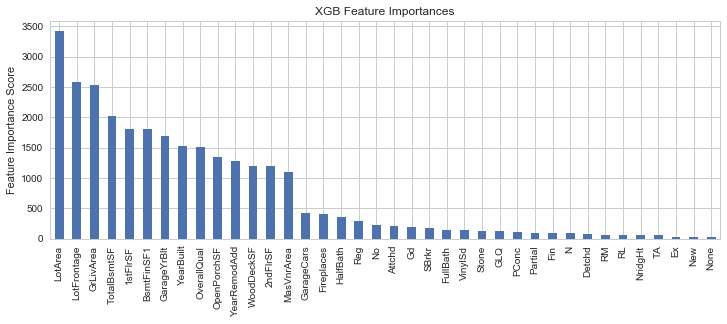

In [72]:
xgb = xgb_best_model.named_steps["XGB"]
score = xgb.get_booster().get_fscore()
print(score)
feat_imp = pd.Series(score).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='XGB Feature Importances')
plt.ylabel('Feature Importance Score')

## XGB Predict Sale Price of Test Data Set 

In [53]:
y_test_pred = xgb_best_model.predict(X_test)
y_test_pred = np.exp(y_test_pred)

xgb_prediction = pd.DataFrame({ "Id": df_test["Id"].values, "SalePrice": y_test_pred })

xgb_prediction.to_csv("kaggle_python_xgboost.csv", index= False)
print('XGB Predictions file saved to disk')

XGB Predictions file saved to disk


# Ensemble and Kaggle Submission 

We can create a robust predictive model with better accuracy by merging two or more machine learning algorithms. This technique is called model ensembling. Ensembled algorithms may be similar in functionality or may entirely be different from each other. Individual algorithms may not perform great but by ensembling them, the overall system can offer much better performance and accuracy. Variations in the predicting logic in each of these individual algorithms will bring unbiasedness into the unified model. Bagging, boosting and stacking are popular ensembling techniques. Many of the advanced machine learning algorithms use ensembled approaches to achieve accurate classifications or predictions. Random Forest uses bagging, XGBoost uses boosting and Neural Network applies stacking ensembling techniques. For the kaggle submission, I have created an ensembled model by averaging Sale Price of the top 2 performing ensembled algorithms - XGBoost and Random Forest.

In [62]:
#ensemble best 2 algorithms XGB and Random Forest using majority vote

from mlxtend.classifier import EnsembleVoteClassifier
import copy

ensemble = EnsembleVoteClassifier(clfs=[('xgb', xgb_best_model), 
                                        ('rf', rf_best_model)], 
                                  weights=[1,1], 
                                  refit=False)

ensemble.fit(X_train, y_train)
y_test_pred = ensemble.predict(X_test)

y_test_pred = np.exp(y_test_pred)

df_predict = pd.DataFrame({'Id': xgb_prediction["Id"], 
                           'SalePrice': y_test_pred})

print(df_predict.head())

df_predict.to_csv('kaggle_python_ensemble.csv', header=True, index=False)

print("...file saved")

     Id  SalePrice
0  1461   1.25e+05
1  1462   1.60e+05
2  1463   1.85e+05
3  1464   1.88e+05
4  1465   1.90e+05
...file saved


**Kaggle Scores** are based on **R^2 Metric**.

In [5]:
scores = pd.DataFrame(columns=["Algorithm", "Kaggle Score"])

scores.loc[len(scores)] = ["Random Forest", "0.14607"]
scores.loc[len(scores)] = ["XGB", "0.13102"]
scores.loc[len(scores)] = ["Ensemble", "0.12600"]
print(scores)

       Algorithm Kaggle Score
0  Random Forest      0.14607
1            XGB      0.13102
2       Ensemble      0.12600


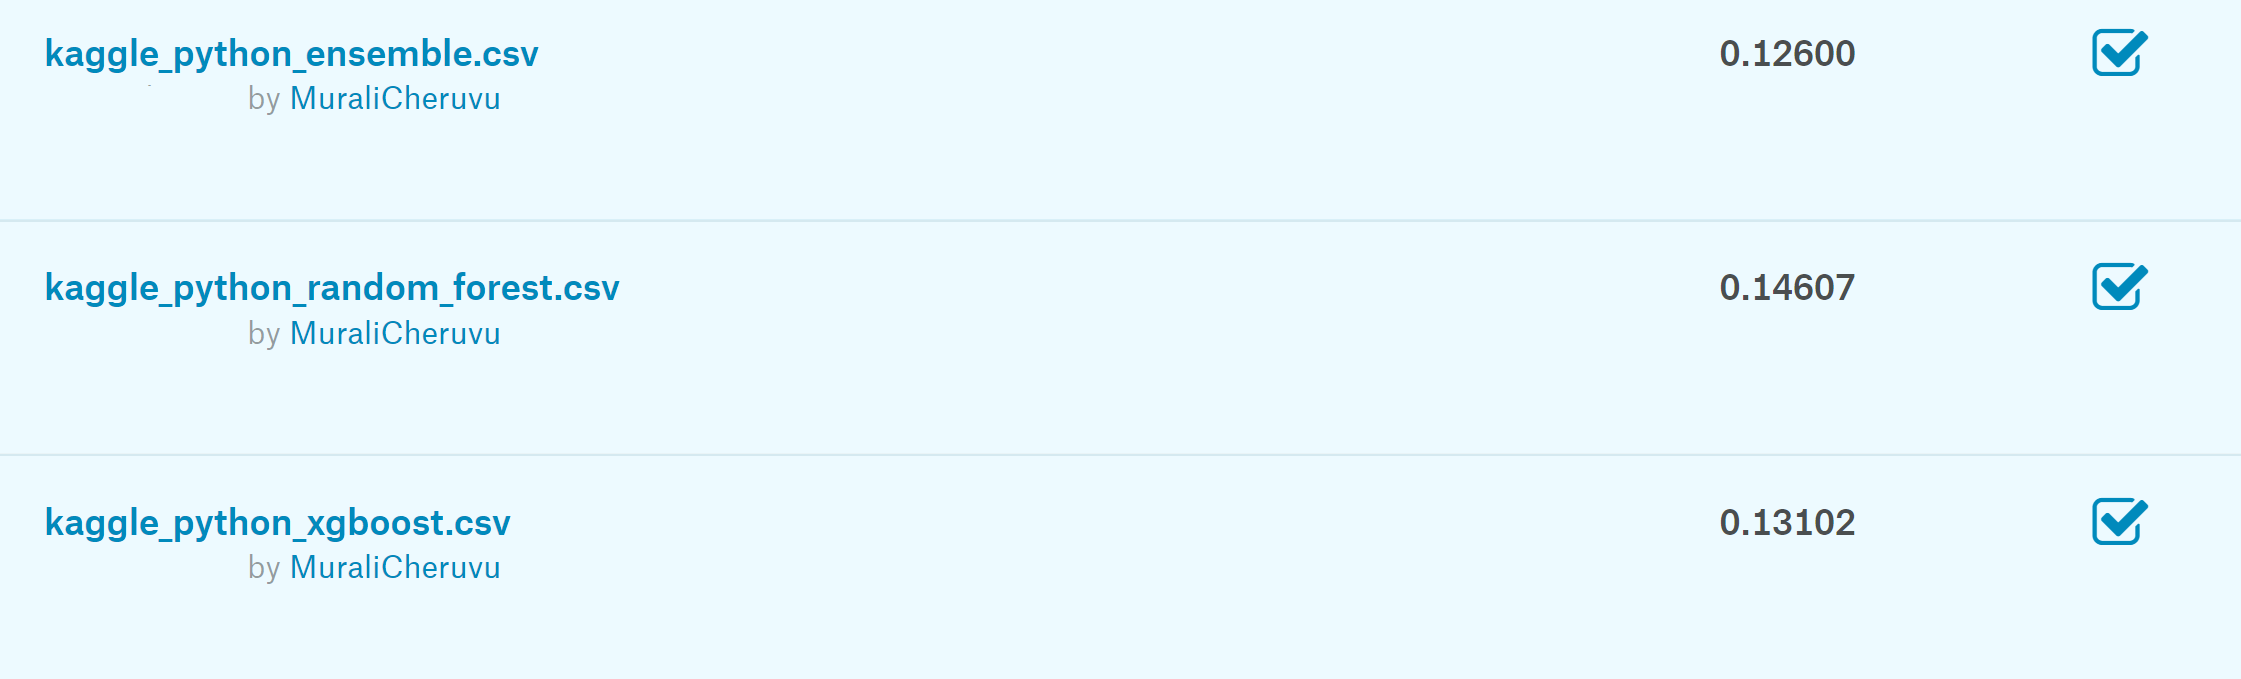